In [1]:
#%pip install scikit-learn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
data_train = pd.read_csv('../input/titanic/train.csv')
data_test = pd.read_csv('../input/titanic/test.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(data_train)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [6]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data_train);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.
We will remove 1 columns.


In [7]:
# Drop the columns
data_train = data_train.drop(columns = list(missing_columns))
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# EXPLORATORY DATA ANALYSIS

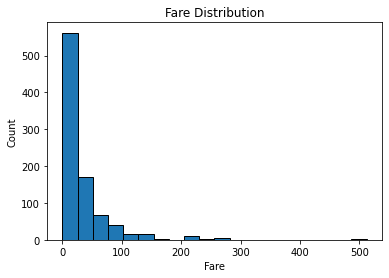

In [8]:
plt.hist(data_train['Fare'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Fare'); 
plt.ylabel('Count'); 
plt.title('Fare Distribution');

# Looking for Relationships

In [9]:
# Create a list of passengers type with more than 100 measurements
genders = data_train.dropna(subset=['Survived'])
genders = genders['Sex'].value_counts()
genders = list(genders[genders.values > 100].index)
genders

['male', 'female']

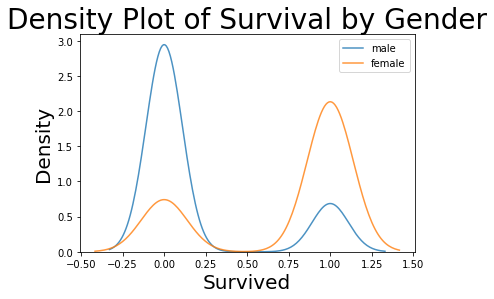

In [10]:
# Plot each building
for p_type in genders:
    # Select the building type
    subset = data_train[data_train['Sex'] == p_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['Survived'].dropna(),
               label = p_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Survived', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Survival by Gender', size = 28);
plt.legend()

In [11]:
# Create a list of passengers type with more than 100 measurements
p_class = data_train.dropna(subset=['Survived'])
p_class = p_class['Pclass'].value_counts()
p_class = list(p_class[p_class.values > 100].index)
p_class

[3, 1, 2]

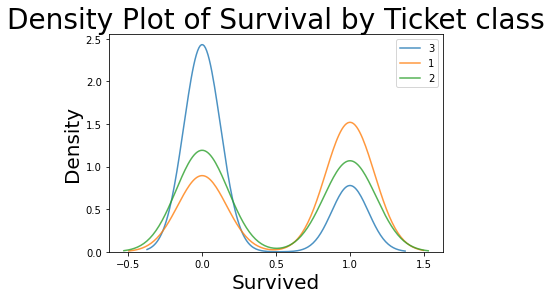

In [12]:
# Plot each building
for p_type in p_class:
    # Select the building type
    subset = data_train[data_train['Pclass'] == p_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['Survived'].dropna(),
               label = p_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Survived', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Survival by Ticket class', size = 28);
plt.legend()

In [13]:
# Create a list of passengers type with more than 100 measurements
emb = data_train.dropna(subset=['Survived'])
emb = emb['Embarked'].value_counts()
emb = list(emb[emb.values > 50].index)
emb

['S', 'C', 'Q']

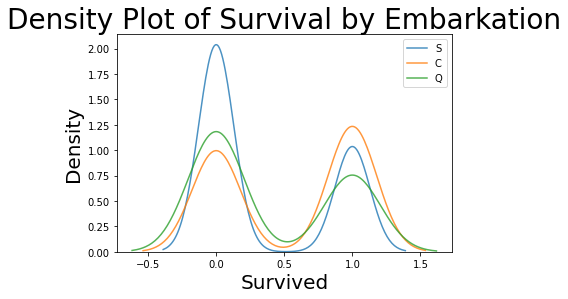

In [14]:
# Plot each building
for p_type in emb:
    # Select the building type
    subset = data_train[data_train['Embarked'] == p_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['Survived'].dropna(),
               label = p_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Survived', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Survival by Embarkation', size = 28);
plt.legend()

In [15]:
# Find all correlations and sort 
correlations_data = data_train.corr()['Survived'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64 

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64


In [16]:
data_train = pd.concat([data_train, pd.get_dummies(data_train[['Sex','Embarked']])], axis = 1)
data_test = pd.concat([data_test, pd.get_dummies(data_test[['Sex','Embarked']])], axis = 1)

In [17]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,1,0,0


In [18]:
X_train = data_train[['Pclass','Sex_male','Age','SibSp','Parch','Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']]
y_train = data_train['Survived']
X_test = data_test[['Pclass','Sex_male','Age','SibSp','Parch','Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  1.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 28., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
#y_test = np.array(y_test).reshape((-1, ))

y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [22]:
# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum((1-np.abs(y_true - y_pred)))/np.shape(y_true)[0]

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_train)
    #model_perf = accuracy(y_test, model_pred)
    
    # Return the performance metric
    # return model_perf

In [23]:
X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

In [24]:
svm = SVR(C = 1000, gamma = 0.1)

svm.fit(X_train, y_train)
pred = svm.predict(X_train)


print('SVM Performance on the training set: accuracy = %0.4f' % accuracy(pred, y_train))

SVM Performance on the training set: accuracy = 0.7782


In [25]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_train)


print('K-Nearest Neighbors Regression Performance on the training set: accuracy = %0.4f' % accuracy(pred, y_train))

K-Nearest Neighbors Regression Performance on the training set: accuracy = 0.7689


In [26]:
random_forest = RandomForestClassifier(random_state=60)
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_train)

print('Random Forest Performance on the training set: accuracy = %0.4f' % accuracy(pred, y_train))

Random Forest Performance on the training set: accuracy = 0.9787


In [27]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_train)


print('Logistic Regression Performance on the training set: accuracy = %0.4f' % accuracy(pred, y_train))

Logistic Regression Performance on the training set: accuracy = 0.8002


In [28]:
pd.DataFrame(X_train, columns = ['const','Pclass','Sex_male','Age','SibSp','Parch','Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']).describe()

,const,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.0,0.654321,0.647587,0.363679,0.065376,0.063599,0.062858,0.188552,0.086420,0.722783
std,0.0,0.418036,0.477990,0.163605,0.137843,0.134343,0.096995,0.391372,0.281141,0.447876
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000
50%,1.0,1.000000,1.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted.fit(X_train, y_train)
pred = gradient_boosted.predict(X_train)

print('Gradient boosting Performance on the training set: accuracy = %0.4f' % accuracy(pred, y_train))

Gradient boosting Performance on the training set: accuracy = 0.7862


In [30]:
data_test['Survived'] = random_forest.predict(X_test)
submission = data_test[['PassengerId','Survived']]
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
submission.to_csv('submission.csv',header=True,columns = ['PassengerId','Survived'],index=False)

In [32]:
importance = lr.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.DataFrame(importance.reshape(1,-1), columns = ['const','Pclass','Sex_male','Age','SibSp','Parch','Fare','Embarked_C', 'Embarked_Q', 'Embarked_S'])
feat_importances

,const,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.002066,-1.989203,-2.553975,-2.087473,-1.426298,-0.404733,0.469168,0.119994,0.0085,-0.343107
